In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import re


In [19]:
os.chdir('D:\Python\SECT_POP')

path = 'data'

files = []

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if re.search('SECTOR(S|EN).*xlsx',file):
            files.append(os.path.join(r, file))

            datasets = []
for i, file in enumerate(files):
    df = pd.read_excel(file)
    if 'OPPERVLAKKTE IN HM²' in df.columns:
        df = df.rename(columns = {'OPPERVLAKKTE IN HM²':'OPPERVLAKTE IN HM²'})
        print('Fixed erroneous column name.')
    df['JAAR'] = file[-9:-5]
    datasets.append(df)

df = pd.concat(datasets)


Fixed erroneous column name.
d:\Python\SECT_POP\.env\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [20]:
tax = pd.read_excel('data\TF_PSNL_INC_TAX_SECTOR.xlsx', converters = {'CD_YEAR':str, 'CD_REFNIS_SECTOR':str})

In [21]:
immo = pd.read_excel('data\TF_IMMO_SECTOR.xlsx', dtype=str)
immo = immo.rename(columns={'CD_STAT_SECTOR':'CD_REFNIS_SECTOR'})

In [22]:
df = df[df['TX_DESCR_NL'] == 'Destelbergen']
df = df[['JAAR','CD_REFNIS','CD_SECTOR','OPPERVLAKTE IN HM²','POPULATION','TX_DESCR_NL','TX_DESCR_SECTOR_NL']]
df['CD_REFNIS_SECTOR'] = df['CD_REFNIS'].map(str) + df['CD_SECTOR'].map(str)

In [23]:
df.set_index(df['JAAR'].map(str) + '_' + df['CD_REFNIS_SECTOR'].map(str))


,JAAR,CD_REFNIS,CD_SECTOR,OPPERVLAKTE IN HM²,POPULATION,TX_DESCR_NL,TX_DESCR_SECTOR_NL,CD_REFNIS_SECTOR
2019_4401344013A00-,2019,44013,44013A00-,39.305953,635,Destelbergen,DESTELBERGEN-DORP,4401344013A00-
2019_4401344013A011,2019,44013,44013A011,54.723231,1067,Destelbergen,BORREMS,4401344013A011
2019_4401344013A022,2019,44013,44013A022,79.743017,474,Destelbergen,RAMEN,4401344013A022
2019_4401344013A033,2019,44013,44013A033,61.495175,880,Destelbergen,HUL,4401344013A033
2019_4401344013A042,2019,44013,44013A042,89.295734,763,Destelbergen,DE DAM - VISSERSHOEK,4401344013A042
...,...,...,...,...,...,...,...,...
2017_44013B191,2017,44013,B191,134.327128,361,Destelbergen,VEERHOEK,44013B191
2017_44013B20-,2017,44013,B20-,31.779181,197,Destelbergen,MELLEHOEK,44013B20-
2017_44013B312,2017,44013,B312,65.743123,588,Destelbergen,STAPSTEEN,44013B312
2017_44013B392,2017,44013,B392,248.868614,130,Destelbergen,DE POELEN,44013B392


In [24]:
tax = tax[['CD_YEAR','CD_REFNIS_SECTOR','MS_NBR_NON_ZERO_INC','MS_TOT_NET_TAXABLE_INC','MS_AVG_TOT_NET_TAXABLE_INC','MS_MEDIAN_NET_TAXABLE_INC','MS_INT_QUART_DIFF','MS_INT_QUART_COEFF','MS_INT_QUART_ASSYM']]
destelbergen = df.merge(tax, left_on = ['JAAR','CD_REFNIS_SECTOR'], right_on = ['CD_YEAR','CD_REFNIS_SECTOR'], how = 'left')

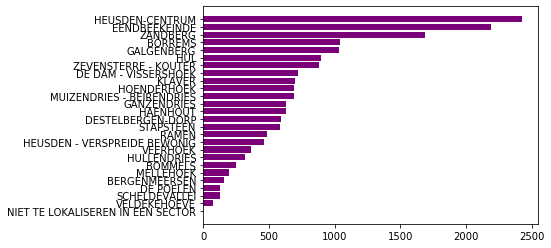

In [41]:

d = destelbergen
d = d.sort_values('POPULATION', ascending = False)
fix, ax = plt.subplots()
ax.barh(d[d.JAAR == '2017'].TX_DESCR_SECTOR_NL, d[d.JAAR == '2017'].POPULATION, color = '#7a0177')
ax.invert_yaxis()
plt.show()



In [56]:
destelbergen_initieel = destelbergen[destelbergen.JAAR == '2011'][['CD_REFNIS_SECTOR','POPULATION']]

destelbergen_initieel = destelbergen_initieel.rename(columns={'POPULATION':'POPULATION_INITIAL'})
destelbergen = destelbergen.merge(destelbergen_initieel, on = 'CD_REFNIS_SECTOR')

destelbergen.head()

destelbergen['EVOLUTION'] = destelbergen['POPULATION'] / destelbergen['POPULATION_INITIAL'] * 100
